# Cross Validation for Space Influenza example

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import pymc_bart as pmb
from scipy.special import expit
from sklearn.model_selection import KFold

In [2]:
RANDOM_SEED = 8457
rng = np.random.RandomState(RANDOM_SEED)
az.style.use("arviz-white")
plt.rcParams["figure.dpi"] = 300

## Data generation

In [3]:
sin = np.loadtxt("space_influenza.csv", skiprows=1, delimiter=",")
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

X = sin[:, 1][:, None]
Y = sin[:, 2]

In [4]:
rmse = []
mad = []
cv_scores = {}
ms = ["10", "20", "50", "100", "200"]

for m in ms:
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        with pm.Model() as model:
            μ = pmb.BART("μ", X, Y, m=int(m))
            y = pm.Bernoulli("y", p=pm.math.sigmoid(μ), observed=Y)
            idata = pm.sample(
                chains=4,
                random_seed=RANDOM_SEED,
                compute_convergence_checks=False,
            )

        new_y = expit(
            pmb.utils._sample_posterior(
                μ.owner.op.all_trees,
                X_test,
                np.random.default_rng(RANDOM_SEED),
                size=100,
            )
        )
        rmse_ = np.mean((new_y.squeeze() - y_test) ** 2, axis=1) ** 0.5
        rmse.append(rmse_)
    cv_scores[m] = np.mean(rmse), np.std(rmse)

Multiprocess sampling (4 chains in 3 jobs)
PGBART: [μ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.
Multiprocess sampling (4 chains in 3 jobs)
PGBART: [μ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.
Multiprocess sampling (4 chains in 3 jobs)
PGBART: [μ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.
Multiprocess sampling (4 chains in 3 jobs)
PGBART: [μ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.
Multiprocess sampling (4 chains in 3 jobs)
PGBART: [μ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.
Multiprocess sampling (4 chains in 3 jobs)
PGBART: [μ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.
Multiprocess sampling (4 chains in 3 jobs)
PGBART: [μ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.
Multiprocess sampling (4 chains in 3 jobs)
PGBART: [μ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.
Multiprocess sampling (4 chains in 3 jobs)
PGBART: [μ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.
Multiprocess sampling (4 chains in 3 jobs)
PGBART: [μ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.
Multiprocess sampling (4 chains in 3 jobs)
PGBART: [μ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 77 seconds.
Multiprocess sampling (4 chains in 3 jobs)
PGBART: [μ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 76 seconds.
Multiprocess sampling (4 chains in 3 jobs)
PGBART: [μ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 77 seconds.
Multiprocess sampling (4 chains in 3 jobs)
PGBART: [μ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 78 seconds.
Multiprocess sampling (4 chains in 3 jobs)
PGBART: [μ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 77 seconds.
Multiprocess sampling (4 chains in 3 jobs)
PGBART: [μ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 154 seconds.
Multiprocess sampling (4 chains in 3 jobs)
PGBART: [μ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 153 seconds.
Multiprocess sampling (4 chains in 3 jobs)
PGBART: [μ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 151 seconds.
Multiprocess sampling (4 chains in 3 jobs)
PGBART: [μ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 152 seconds.
Multiprocess sampling (4 chains in 3 jobs)
PGBART: [μ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 152 seconds.
Multiprocess sampling (4 chains in 3 jobs)
PGBART: [μ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 306 seconds.
Multiprocess sampling (4 chains in 3 jobs)
PGBART: [μ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 307 seconds.
Multiprocess sampling (4 chains in 3 jobs)
PGBART: [μ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 306 seconds.
Multiprocess sampling (4 chains in 3 jobs)
PGBART: [μ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 305 seconds.
Multiprocess sampling (4 chains in 3 jobs)
PGBART: [μ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 304 seconds.


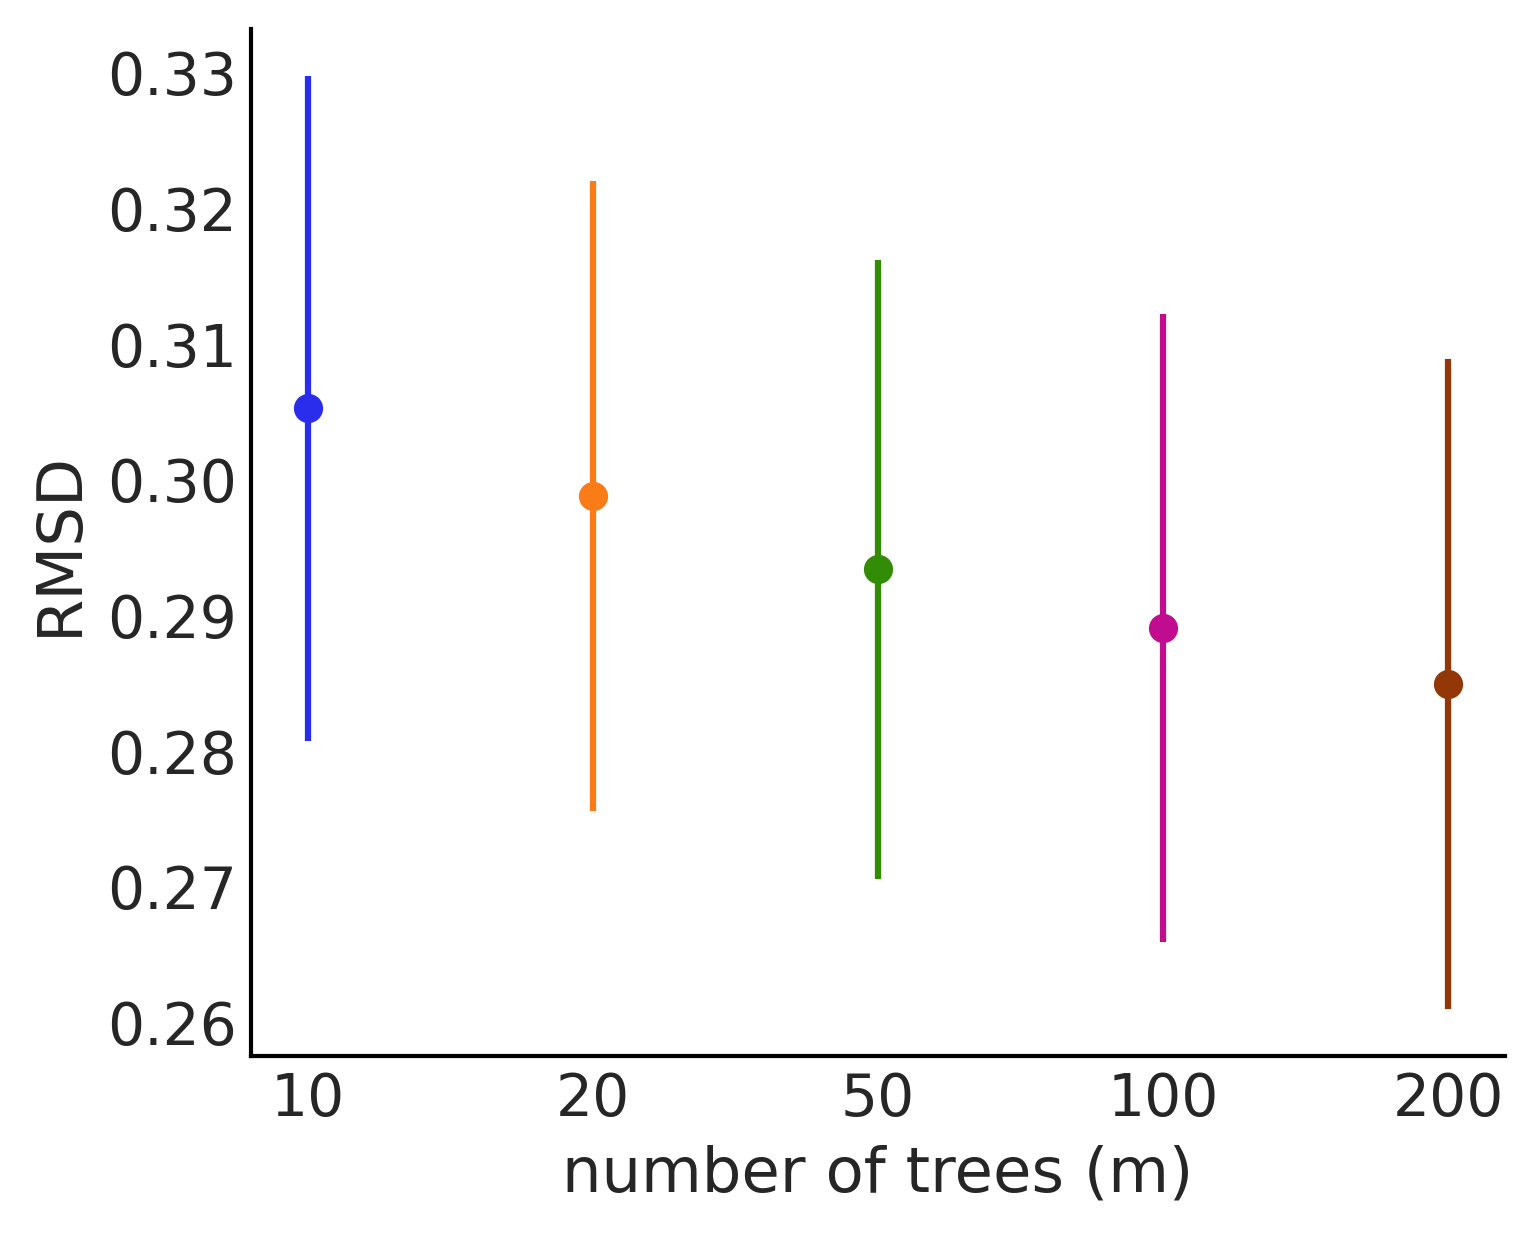

In [5]:
fig, ax = plt.subplots(figsize=(5, 4))

for i, (k, v) in enumerate(cv_scores.items()):
    ax.errorbar(i, v[0], v[1], fmt="o")

ax.set_ylabel("RMSD")
ax.set_xticks(range(len(ms)))
ax.set_xticklabels(ms)
ax.set_xlabel("number of trees (m)")
plt.savefig("space_influenza_cv.png");